In [20]:
import pandas as pd
import numpy as np
import re

from tabula import read_pdf
from tabulate import tabulate
import pdfplumber
import openpyxl

from Script import ExtractPDFTables, MapLinks2Excel
import camelot.io as camelot




In [46]:
from ghostscript import Ghostscript



SyntaxError: invalid syntax (1767815816.py, line 1)

# 1 .Table Extraction and Mapping (SGD-GRI Link)

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/SDG-GRI/sdg-gri.pdf'
page_range = [list(range(3, 73)), list(range(74, 99))]
area = [80.51, 90.42, 561.96, 814.18]

tableTCFD_GRI = ExtractPDFTables(pdf_path, page_range, area)
df = tableTCFD_GRI.getTablesSDG_GRI('ESG-Frameworks/ESG Data/SDG_info.csv')

## Mapping Collected Dataframe (SDG-GRI)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "SDG's"

mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.MapSDG_GRI()

## Mapping Collected Dataframe (GRI-SDG)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "GRI 2016"

mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.MapGRI_SDG()

# 2. Table Extraction and Mapping (COH4B-GRI Link)

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/GRI-COH4B/gri-coh4b.pdf'
page_range = list(range(13, 22))


tableGRI_COH4B = ExtractPDFTables(pdf_path, page_range)
df = tableGRI_COH4B.getTablesGRI_COH4B()
df = tableGRI_COH4B.setHeaders(df, 0)
df = tableGRI_COH4B.headerSwap(df, 'A. COHBP & \ndefinition', None, 'id')
df = tableGRI_COH4B.addDot(df, 'id')



df = tableGRI_COH4B.extractDisclosures1(df, 'D. GRI disclosures', 'GRI Standards', '[0-9]{3}-[0-9]{2}|[0-9]{3}-[0-9]{1}', re.search)



In [ ]:
# df

## Mapping Collected Dataframe (COH4B-GRI)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "COH4B"

mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.MapCOH4B_GRI()

## Mapping Collected Dataframe (GRI-COH4B)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "GRI 2016"

mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.MapGRI_COH4B()

# 3. Table Extraction and Mapping (TCFD-GRI Link)

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/TCFD-GRI/TCFD to GRI.pdf'
page_range = list(range(49, 59))


tableTCFD_GRI = ExtractPDFTables(pdf_path, page_range)
df = tableTCFD_GRI.getTablesTCFD_GRI()
df = tableTCFD_GRI.extractDisclosures2(df, 'Related \ncode/\nparagraph', 'GRI Standards', r'[0-9]{3}-[0-9]{2}|[0-9]{3}-[0-9]{1}', re.findall)
df = tableTCFD_GRI.extractDisclosures2(df, 'Recommended \nDisclosures \n(TCFD Framework)', 'id', r'\w+\s[abc]\.', re.findall)




# [a-zA-Z]\.

## Mapping Collected Dataframe (TCDF-GRI)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "TCFD"


mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.mapTCFD_GRI()


## Mapping Collected Dataframe (GRI-TCDF)

In [ ]:
df = tableTCFD_GRI.df_gri_tcdf(df)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "GRI 2016"


mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.mapGRI_TCFD()

# 4. Table Extraction and Mapping (GRI 2016- GRI 2021)

### Reading extracted csv from excel and fixing the columns names, this new csv file will be use for future mapping

In [ ]:
# df = pd.read_csv('ESG-Frameworks/Mapping-Standards/GRI 2016-2021//GRI2016-2021.csv', sep=';')
# df = df.iloc[0:67]
# df.rename(columns = {"GRI Standard Title": "GRI Standard Title 2016",
#                      "Disclosure Number": "Disclosure Number 2016",
#                      "Disclosure Name\nIndividual requirements ('a', 'b', 'c', etc.) are not listed here": 'GRI 2016 Description',
#                      "Section": "Section 2016",
#                      "Page Number": "Page Number 2016",
#                      "GRI Standard Title.1": "GRI 2021 Standard Title",
#                      "Disclosure Number.1": "Disclosure Number 2021",
#                      "Disclosure Name\nIndividual requirements ('a', 'b', 'c', etc.) are not listed here.1": 'GRI 2021 Description',
#                      "Section.1": "Section 2021",
#                      "Page Number.1": 'Page Number 2021'},
#                       inplace = True)


In [ ]:
# df.to_csv('GRI2016-2021.csv')

## Mapping GRI 2021 ON GRI 2016 sheet

#### Source code for method

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = 'GRI 2016'

wb = openpyxl.load_workbook(path_file)
ws = wb[sheet]

rows = ws.max_row

print(rows)
# print(rows)
for i in range(3, rows):
    if ws.cell(row=i, column=2).value != None:
        target_cell = ws.cell(row=i, column=2).value
        # print(target_cell)
        
        if target_cell != None:
            try:
                disclosure_to_add = df.loc[df['Disclosure Number 2016'] == target_cell]['Disclosure Number 2021'].item()
                ws.cell(row=i, column=4, value=str(disclosure_to_add))
                
                section_to_add = df.loc[df['Disclosure Number 2016'] == target_cell]['Section 2021'].item()
                	
                ws.cell(row=i, column=5, value=str(section_to_add))	

            except:
                pass
        
        
       

wb.save(path_file)

print(f'{sheet} sheet from Excel file have bee mapped')

In [ ]:
df = pd.read_csv('ESG-Frameworks/Mapping-Standards/GRI 2016-2021//GRI2016-2021.csv')
df = df.drop('Unnamed: 0', axis=1)

### Mapping GRI 2021 to 2016 sheet using class method

In [ ]:
df = pd.read_csv('ESG-Frameworks/Mapping-Standards/GRI 2016-2021//GRI2016-2021.csv')
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "GRI 2016"


mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.mapGRI2016_2021()

## Mapping GRI 2016 ON GRI 2021sheet

In [ ]:
df = pd.read_csv('ESG-Frameworks/Mapping-Standards/GRI 2016-2021//GRI2016-2021.csv')
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
# sheet = "GRI 2021"

# a = []
# wb = openpyxl.load_workbook(excelFilePath)
# ws = wb[sheet]
# rows = ws.max_row

# regex = '[1-9]+-[1-9]+'

# for i in range(3, rows):
# 	if ws.cell(row=i, column=2).value == None:
# 		pass
    
# 	else:
# 		target_cell = ws.cell(row=i, column=2).value

# 		if target_cell != None:
# 			try:
# 				disclosure_to_add = df.loc[df['Disclosure Number 2021'] == target_cell]['Disclosure Number 2016'].values
# 				# print(disclosure_to_add)
# 				ws.cell(row=i, column=4, value='\n'.join(disclosure_to_add))

                
# 				section_to_add = df.loc[df['Disclosure Number 2021'] == target_cell]['Section 2016'].values

                
# 				ws.cell(row=i, column=5, value=section_to_add[0])

# 			except:
# 					pass

# wb.save(excelFilePath)

# # print(f"{sheet} sheet from Excel file have bee mapped with it's GRI 2021 equivalent")



In [ ]:
excelFilePath = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = "GRI 2021"


mapp = MapLinks2Excel(df, sheet, excelFilePath)
mapp.mapGRI2021_2016()

# 5 Table Extraction and Mapping(CASS CSR 4.0 - GRI 2016)

## Source code to extract pdf

In [ ]:
file_path = 'ESG-Frameworks/Mapping-Standards/CASSCSR-GRI/CASS_CSR-GRI.pdf'
page_range = list(range(7, 30))

pdf = pdfplumber.open(file_path, pages=page_range)
frames = []

for i in range(0, len(page_range)):
	try:
		page = pdf.pages[i]
		table = page.extract_table()
		frames.append(pd.DataFrame(table))
			
	except:
		pass

df =  pd.concat(frames)
df.columns = df.iloc[0]
df = df[1:]
find_duplicate = df['KPI \n(CASSCSR-4.0)'].isin(['KPI \n(CASSCSR-4.0)'])

df = df[~find_duplicate]

## Getting data from pdf CASS_GRI 2016

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/CASSCSR-GRI/CASS_CSR-GRI.pdf'
page_range = list(range(7, 30))


tableCASS_G0RI = ExtractPDFTables(pdf_path, page_range)
df = tableCASS_GRI.getTablesCASS_GRI()

In [ ]:
df

## Mapping to excel! source code  CASS ON GRI2016 SHEET

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'

sheet = 'GRI 2016'

regex = '\w[+-]?[0-9]+\.+\d+'

wb = openpyxl.load_workbook(path_file)
ws = wb[sheet]
rows = ws.max_row


for i in range(3, rows):
	if ws.cell(row=i, column=2).value == None:
		pass

	else:
		target_cell = ws.cell(row=i, column=2).value
		# print(target_cell)

        
		if target_cell != None:
            
			try:
				disclosure_to_add = df.loc[df['ID_GRI'] == target_cell]['ID_CASS_CSR'].values
				
                
				if len(disclosure_to_add) > 0:
					disclosure_to_add_ = [i[re.search(regex, i).start():re.search(regex, i).end()] for i in disclosure_to_add]
					# print(disclosure_to_add_)
					ws.cell(row=i, column=12, value='\n'.join(disclosure_to_add_))
                    
				section_to_add = df.loc[df['ID_GRI'] == target_cell]['KPI \n(CASSCSR-4.0)'].values
                
                
				if len(section_to_add)>0:
                    
					# print(section_to_add)
					ws.cell(row=i, column=13, value='\n'.join(section_to_add))	

			except:
				pass
wb.save(path_file)

## Mapping to Excel Class method CASS on GRI 20016

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'

sheet = 'GRI 2016'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapCASS_GRI1016()

## Mapping to Excel GRI2016 ON CASS 

### Source Code

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'

sheet = 'CASS CSR 4.0'


wb = openpyxl.load_workbook(path_file)
ws = wb[sheet]
rows = ws.max_row



    
    
for i in range(3, len(df['ID_CASS_CSR'])):

    ws.cell(row=i, column=1, value=df['ID_CASS_CSR'][i])
    ws.cell(row=i, column=2, value=df['KPI \n(CASSCSR-4.0)'][i])
    ws.cell(row=i, column=3, value=df['ID_GRI'][i])
    ws.cell(row=i, column=4, value=df['Disclosure title (GRI)'][i])
    

wb.save(path_file)


### Mapping GRI TO CASS WITH CLASS METHOD

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'

sheet = 'CASS CSR 4.0'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapGRI2016_CASS()

In [ ]:
df

# 6. Table Extraction and Mapping(CDP 2017 - GRI 2016)

## Getting Tables from doc

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/CDP17-GRI/Cdp 2017 to GRI.pdf'
page_range = list(range(2, 32))


tableCDP_GRI = ExtractPDFTables(pdf_path, page_range)
df = tableCDP_GRI.getTablesCDP_GRI()

In [ ]:
df.head(3)

## Mapping CDP 2017 to GRI

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = 'GRI 2016'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapCDPCC17_GRI()


## Mapping GRI to CDP 2017

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'

sheet = 'CDP 2017'

wb = openpyxl.load_workbook(path_file)
ws = wb[sheet]

# print(df['CDP'])
regex = '[a-zA-Z]+.+\d'

r = 3
for i in df['CDP']:
    if re.search(regex, i):
#         print('--------------------------------------')
        ws.cell(row=r, column=1, value=i)
#         print(i)
        r+=1


regex_2 = 'GRI \w+\d:'
    
r = 3
for i in df['GRI']:
    if i != None and re.search(regex_2, i):
        ws.cell(row=r, column=2, value=i)
        r+=1

        

wb.save(path_file)


	

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = 'CDP CC 2017'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapGRI_CDPCC17()


# 7. Table Extraction and Mapping (CDP Water 2018 - GRI)

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/CDP Water 2018 - GRI/CDP 2018 Water to GRI.pdf'
page_range = list(range(6, 29))


tableCDP_GRI = ExtractPDFTables(pdf_path, page_range)
df = tableCDP_GRI.getTablesCDP_GRI()




## Mapping CDP Water 2018 on GRI 2016 sheet

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = 'GRI 2016'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapCDP18_GRI()


## Mapping GRI 2016 ON CDP Water 2018 sheet

In [ ]:
path_file = 'ESG-Frameworks/Outputs/testing.xlsx'
sheet = 'CDP WATER 2018'

mapp = MapLinks2Excel(df, sheet, path_file)
mapp.mapGRI_CEP18()


In [ ]:
df['GRI Disclosures'].str.extract(r'(?m)(?:\r\n?|^)\d\d\d-\d\d:\s*(.*\S)\s*$')

# **8. Table Extraction and Mapping (Financial Reporting Framework)

In [71]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/Financial Reporting Framework/ev22.pdf'
# page_range = [39, 53]
page_range = list(range(39, 53))
# tables = camelot.read_pdf(pdf_path, 
# 								  pages=f'{page_range[0]}-{page_range[1]}',
#                                   flavor = 'lattice',
#                                   table_areas=['316,499,566,337'])



In [99]:
pdf = pdfplumber.open(pdf_path, page_range)

In [101]:
p0 = pdf.pages[0]

In [126]:
im = p0.to_image()


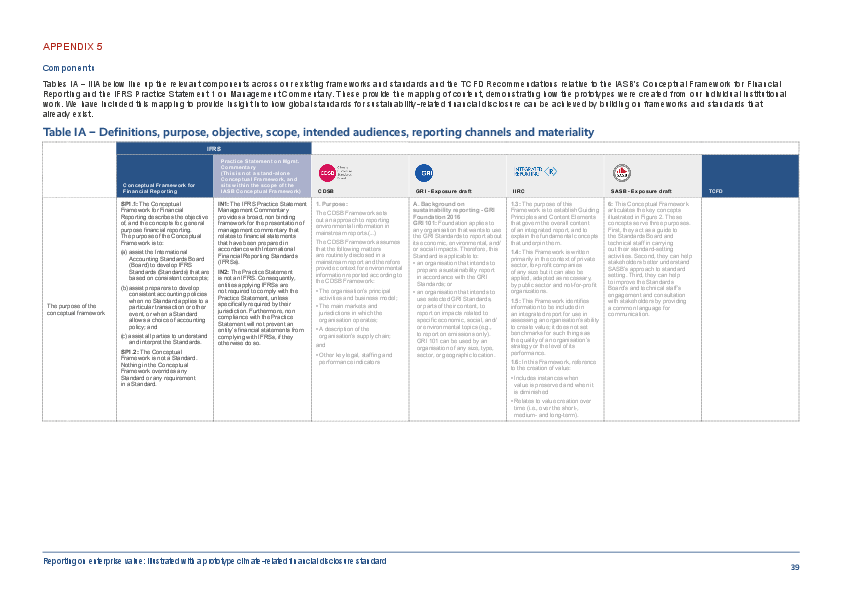

In [128]:
im

In [137]:
p0.debug_tablefinder()

In [117]:
table = p0.extract_table(table_settings={})


NameError: name 'tf' is not defined

In [118]:
df = pd.DataFrame(table[1:], columns=table[0])

In [119]:
df

,,IFRS,NaN,,NaN,NaN,NaN,NaN
0,None,Conceptual Framework for \nFinancial Reporting,Practice Statement on Mgmt. \nCommentary\n(Thi...,CDSB,GRI - Exposure draft,IIRC,SASB - Exposure draft,TCFD
1,The purpose of the \nconceptual framework,SP1.1: The Conceptual \nFramework for Financia...,IN1: The IFRS Practice Statement \nManagement ...,1. Purpose:\nThe CDSB Framework sets \nout an ...,A. Background on \nsustainability reporting - ...,1.3: The purpose of this \nFramework is to est...,6: This Conceptual Framework \narticulates the...,


In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/Financial Reporting Framework/Reporting-on-enterprise-value_climate-prototype_Dec20.pdf'
# page_range = list(range(39, 53))
page_range = [39, 53]


tableFinancialReports = ExtractPDFTables(pdf_path, page_range)
df = tableFinancialReports.getTablesEV22()





In [ ]:
df.to_csv('ss.csv')

# **9. Table Extraction and Mapping CDP CC - TCFD

Note: CC means climate change

In [ ]:
pdf_path = 'ESG-Frameworks/Mapping-Standards/CDP - TCFD/CDP-TCFD-technical-note.pdf'
page_range = [17, 22]


tableFinancialReports = ExtractPDFTables(pdf_path, page_range)
df = tableFinancialReports.getTablesGRIGoal20()




# 10.